In [38]:
#importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/tipping/tips.csv')
#showing the dataset
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
#checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [21]:
#creating the preprocessing function
def preprocess_input(df):
    #creating the copy of the dataset 
    df=df.copy()

    #binary encoding

    df['sex']=df['sex'].replace({'Male':1,'Female':0})
    
    df['smoker']=df['smoker'].replace({'Yes':1,'No':0})

    df['time']=df['time'].replace({'Dinner':1,'Lunch':0})

    
    df['day']=df['day'].replace({'Thur':0,'Fri':1,'Sat':2,'Sun':3})
    






    
    return df

In [22]:
x=preprocess_input(df)
x

/tmp/ipykernel_31/1239029414.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({'Male':1,'Female':0})
/tmp/ipykernel_31/1239029414.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker']=df['smoker'].replace({'Yes':1,'No':0})
/tmp/ipykernel_31/1239029414.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


# Exploratory Data Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

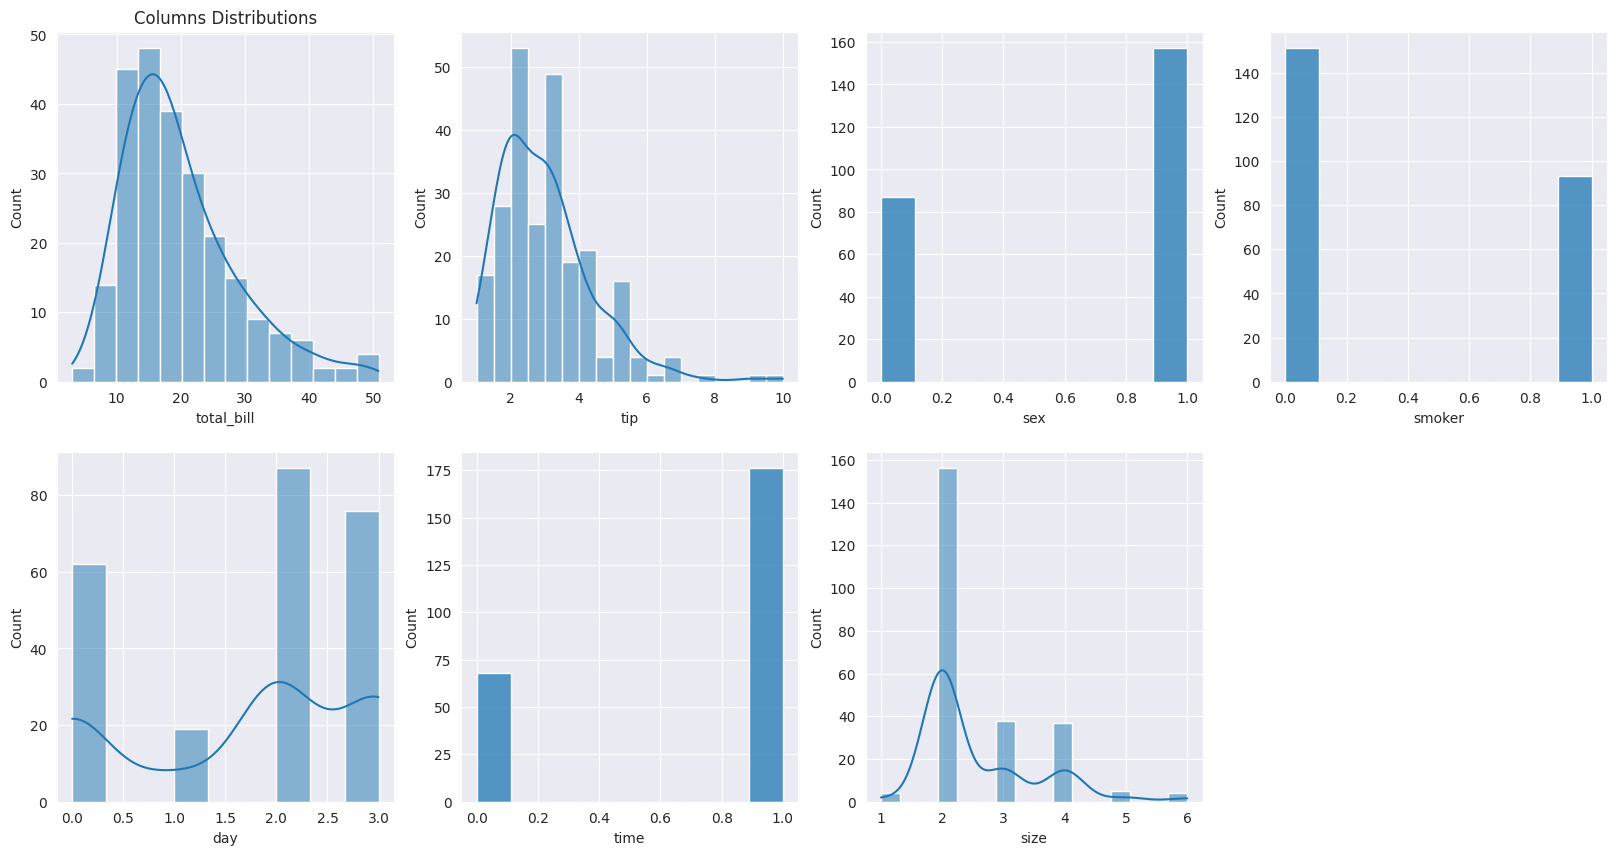

In [25]:
plt.figure(figsize=(20,10))


for i in range(len(x.columns)):
    plt.subplot(2,4,i+1)
    if len(x[x.columns[i]].unique())>2:
        sns.histplot(x[x.columns[i]],kde=True)
    else:
        sns.histplot(x[x.columns[i]],kde=False)
    if i==0:
        plt.title('Columns Distributions')
plt.show()
        


    

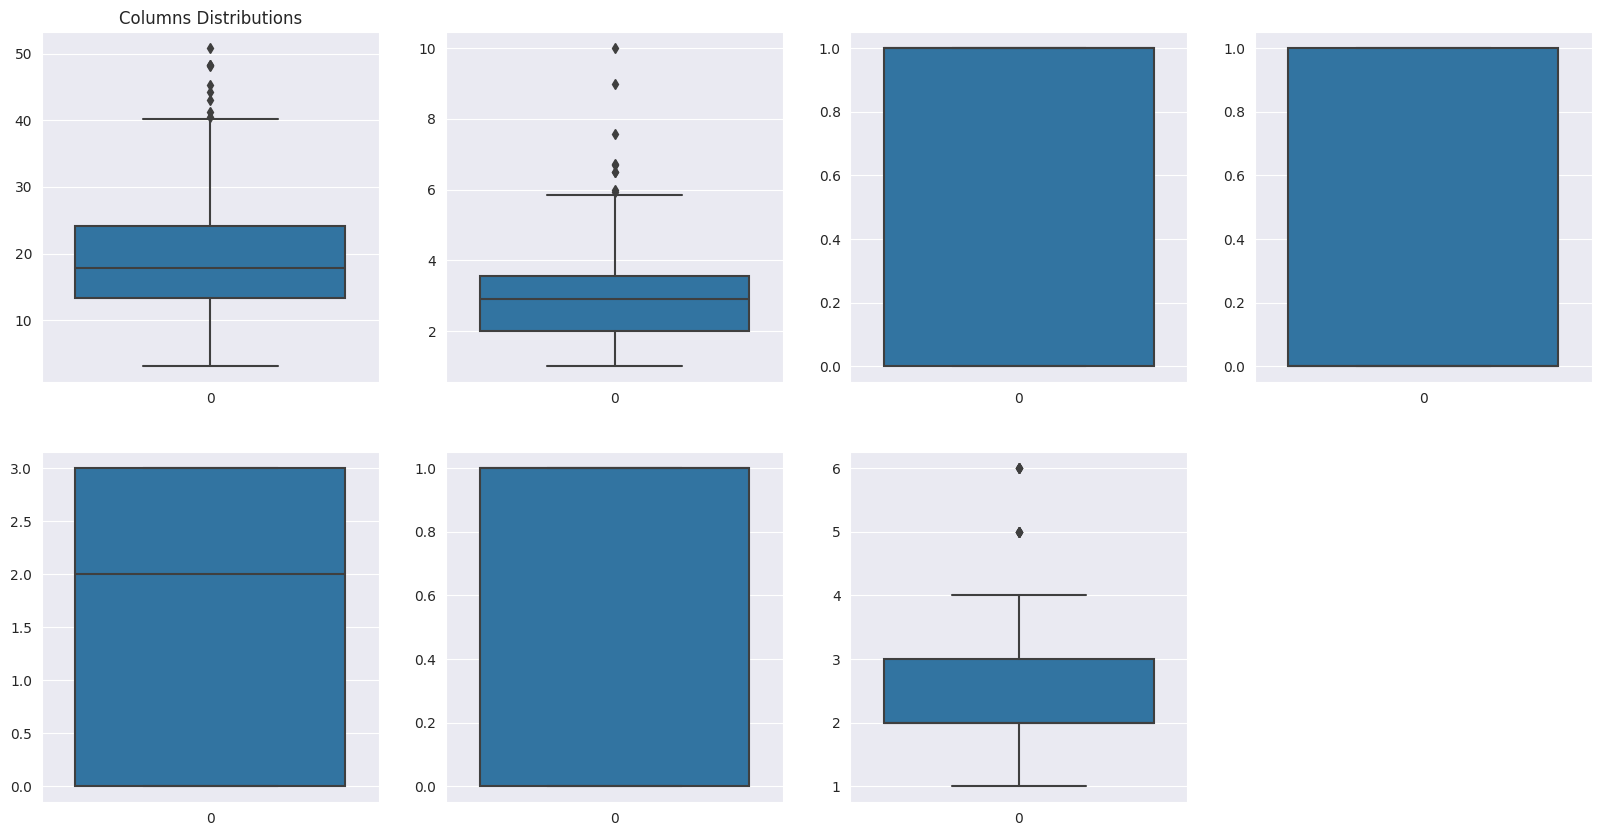

In [27]:
plt.figure(figsize=(20,10))


for i in range(len(x.columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x[x.columns[i]])
    if i==0:
        plt.title('Columns Distributions')
plt.show()
        

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


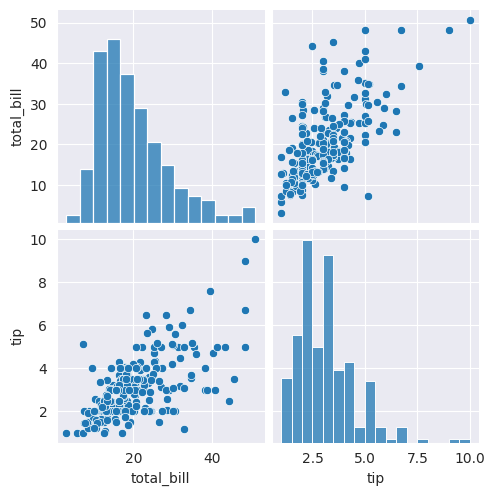

In [29]:
sns.pairplot(x.loc[:,['total_bill','tip']])

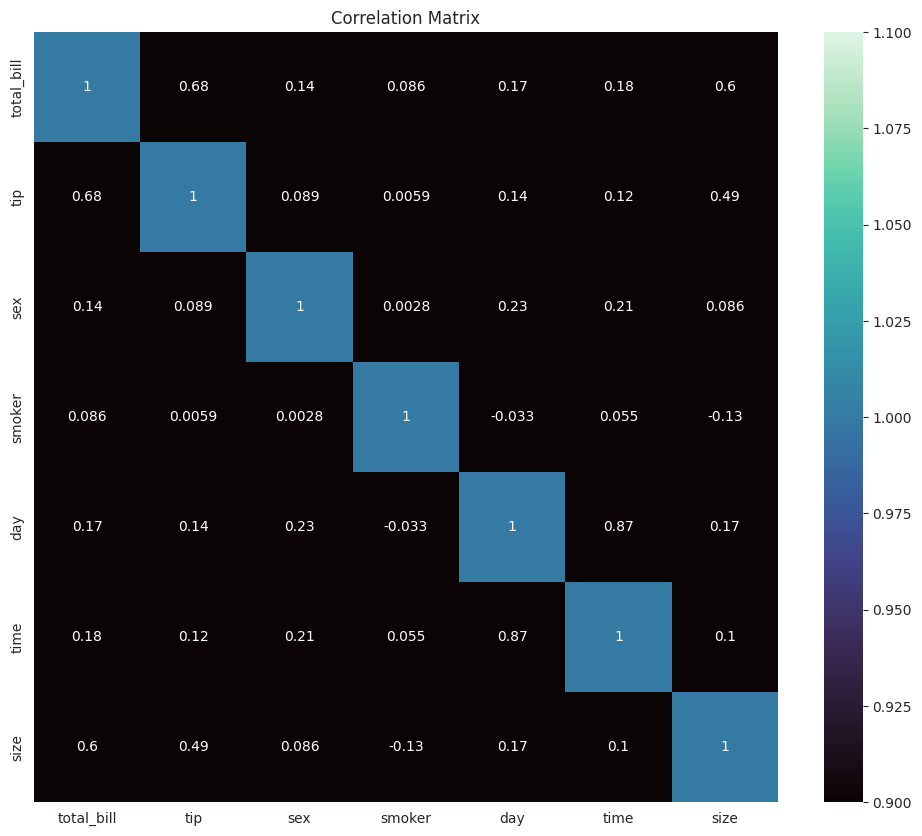

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(),annot=True,vmin=1.0,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

# Training the Model

In [32]:
y=x['tip']
x=x.drop('tip',axis=1)

In [34]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


In [35]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


In [36]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [46]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
#scaling the dataset
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
x_train

,total_bill,sex,smoker,day,time,size
148,-1.134981,0.748086,-0.786796,-1.570587,-1.692228,-0.564569
213,-0.711168,-1.336744,1.270978,0.203498,0.590937,-0.564569
178,-1.156840,-1.336744,1.270978,1.090540,0.590937,-0.564569
41,-0.202349,0.748086,-0.786796,1.090540,0.590937,-0.564569
119,0.601561,-1.336744,-0.786796,-1.570587,-1.692228,1.667448
...,...,...,...,...,...,...
98,0.228751,0.748086,1.270978,-0.683544,0.590937,-0.564569
220,-0.845963,0.748086,1.270978,-0.683544,-1.692228,-0.564569
66,-0.325000,-1.336744,-0.786796,0.203498,0.590937,-0.564569
126,-1.287991,0.748086,-0.786796,-1.570587,-1.692228,-0.564569


In [49]:
model=LinearRegression()
model.fit(x_train,y_train)
print('The accuracy of the model',model.score(x_test,y_test)*100)


The accuracy of the model 52.29358146475494


In [10]:
#checking the unique column in each column
{column:len(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'sex': 2, 'smoker': 2, 'day': 4, 'time': 2}

In [14]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)